[('none', (0, 4)), ('ofthemtook', (4, 14)), ('anynotice', (14, 23)), ('ofdarwin', (23, 31)), ('butthefeathers', (31, 45)), ('andfossilsaroused', (45, 62)), ('mildinterest', (62, 74))]


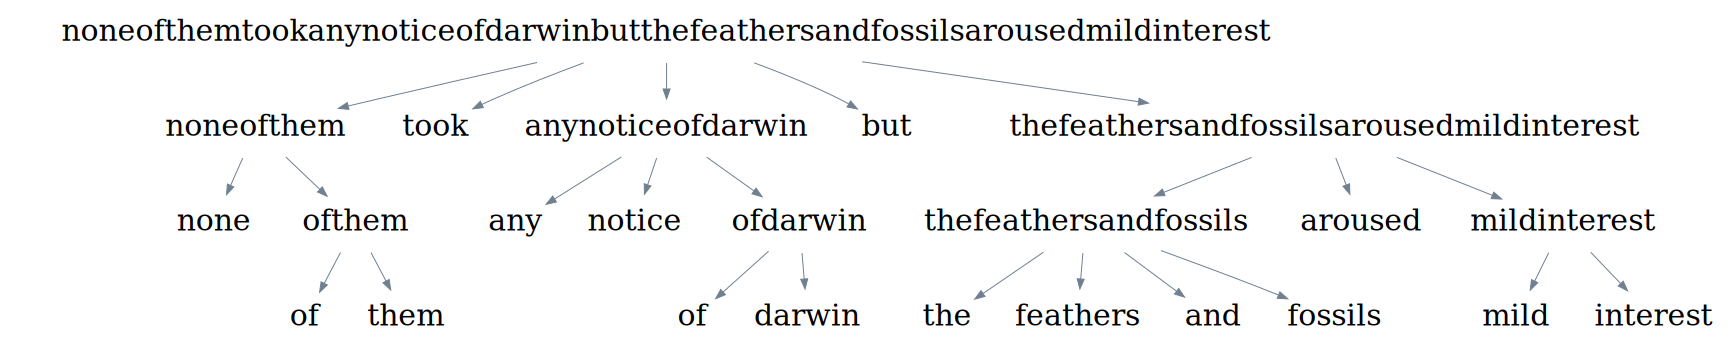

In [13]:
print(phrases_nodes)
test.chain.segment("ud").plot()

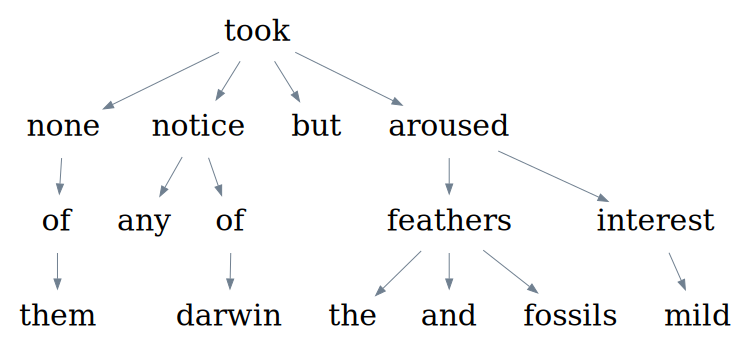

In [14]:
test.chain.segment("ud_original").plot()

0.2


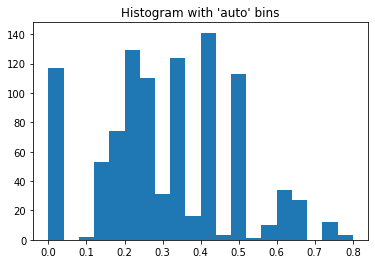

In [14]:
from statistics import mean,median,mode
sum([i for i in collect_phrase_cp if i==1])

import matplotlib.pyplot as plt
# rng = np.random.RandomState(10)  # deterministic random data
# a = np.hstack((rng.normal(size=1000),rng.normal(loc=5, scale=2, size=1000)))

print(mode(collect_phrase_cp))

_ = plt.hist(collect_phrase_cp, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [7]:
HO_types = []
phrases_strings = [" ".join([" ".join(phrases[j].keys()) if j!=i else "[MASK]" for j in range(len(phrases))]) for i in range(len(phrases))]
for sent in phrases_strings:

    HO_types.append([i["token_str"] for i in semiotic.unmasker(sent)])

slg.util_g.df(HO_types)

,0,1,2,3,4
0,casualties,claims,continued,",",.
1,victory,still,",",.,;
2,losses,reportedly,continues,;,:
3,targets,has,remains,yet,—
4,gains,claim,stands,elusive,…
...,...,...,...,...,...
95,execution,charges,raged,except,。
96,pursuit,signals,emerged,fate,hence
97,aim,routes,!,!,preceding
98,goals,there,counts,impossible,given


In [ ]:
import spacy
import benepar

nlp_ud = spacy.load("en_core_web_sm")

nlp_cp = spacy.load("en_core_web_sm")
nlp_cp.add_pipe("benepar", config={"model": "benepar_en3"})

In [ ]:

bla = list(nlp_cp(test.chain.raw).sents)[0]
terminal_bigrams = [c for c in list(bla._.constituents) if str(c).count(" ") == 1]
print(terminal_bigrams)
parad_analysis = [(p.entropy,p.mass,l) for l,p in zip(test.chain.split,test.paradigm)]
print(sorted(parad_analysis)[-len(terminal_bigrams):])
df(parad_analysis).T

In [34]:
for p in range(len(test.chain.split)):
    parad_k = test.paradigm[p].keys_t

    len_parad = len(parad_k)

    for n in range(1,5):
        counter = Counter([k[-n:] for k in parad_k]).most_common(5)
        print([(k,v/len_parad) for k,v in counter if v/len_parad>.1])
    print("*************")

[('s', 0.22340425531914893), ('e', 0.2127659574468085), ('y', 0.11702127659574468), ('r', 0.10638297872340426)]
[]
[]
[]
*************
[('s', 0.4375), ('d', 0.2708333333333333)]
[('es', 0.15625), ('ed', 0.15625)]
[]
[]
*************
[]
[]
[]
[]
*************
[('s', 0.26262626262626265), ('g', 0.1414141414141414)]
[('ng', 0.13131313131313133)]
[('ing', 0.13131313131313133)]
[]
*************
[('g', 0.18556701030927836), ('e', 0.12371134020618557), ('t', 0.1134020618556701), ('y', 0.1134020618556701), ('d', 0.10309278350515463)]
[('ng', 0.18556701030927836)]
[('ing', 0.17525773195876287)]
[]
*************
[]
[]
[]
[]
*************
[('e', 0.18), ('n', 0.15), ('r', 0.11)]
[('on', 0.12)]
[]
[]
*************
[('e', 0.18), ('n', 0.11), ('l', 0.11), ('y', 0.11), ('t', 0.11)]
[]
[]
[]
*************
[('f', 0.16666666666666666), ('t', 0.16666666666666666), ('e', 0.16666666666666666), ('d', 0.16666666666666666), ('o', 0.16666666666666666)]
[('of', 0.16666666666666666), ('at', 0.16666666666666666), 

In [25]:
test_sent = random.sample(test_sents,50)

collect = slg.util_g.multiprocessing(semiotic,test_sent)

In [27]:
from tqdm.notebook import tqdm

collect2 = []
for sent in tqdm(test_sent):
    collect2.append(semiotic(sent))

In [1]:
from collections import Counter
bla = Counter()
for s in collect2:
    for p in s.paradigm:
        bla[p.keys]+=1

# bla.most_common(20)


NameError: name 'collect2' is not defined